<div style="direction:rtl"> 

# פרויקט בניתוח נתונים
</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor



In [2]:
url = 'https://raw.githubusercontent.com/dor34340/DorGold/main/world-happiness-report.csv'
hpp = pd.read_csv(url)
hpp

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


<div style="direction:rtl">
בדקנו את סוג המשתנים בכל עמודה על מנת לבדוק האם צריך להמיר לטיפוס אחר 
</div>

In [3]:
hpp.dtypes

Country name                         object
year                                  int64
Life Ladder                         float64
Log GDP per capita                  float64
Social support                      float64
Healthy life expectancy at birth    float64
Freedom to make life choices        float64
Generosity                          float64
Perceptions of corruption           float64
Positive affect                     float64
Negative affect                     float64
dtype: object

<div style="direction:rtl"> 
    התחלנו לטפל בערכים חסרים באמצעות קודים מתאימים
</div>

In [4]:
hpp.isnull().sum().sort_values(ascending=False)

Perceptions of corruption           110
Generosity                           89
Healthy life expectancy at birth     55
Log GDP per capita                   36
Freedom to make life choices         32
Positive affect                      22
Negative affect                      16
Social support                       13
Life Ladder                           0
year                                  0
Country name                          0
dtype: int64

<div style="direction:rtl"> 
בדקנו ידנית את המדינות בעלות כמות ערכים חסרים גבוהה וכעת נוריד אותן מהדאטה. 
    הקריטריון : 3 ערכים חסרים ומעלה
</div>

In [5]:
hpp_df = hpp.loc[(hpp["Country name"] != 'Cuba') & (hpp["Country name"] != 'Belize') & (hpp["Country name"] != 'Oman')]
hpp_df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


<div style="direction:rtl"> 
מילאנו את הערכים החסרים בממוצע של אותה עמודה באמצעות פונקציה שכתבנו, וזאת בשביל לא לפגוע בנתונים הסטטיסטיים והקורלציות שקיימות
</div>

In [6]:
hpp1 = hpp.copy()
hpp2 = hpp1.groupby("Country name")["Life Ladder","Log GDP per capita","Social support","Healthy life expectancy at birth","Freedom to make life choices","Generosity","Perceptions of corruption","Positive affect","Negative affect"].mean()

<ipython-input-6-aabac7752ef6>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  hpp2 = hpp1.groupby("Country name")["Life Ladder","Log GDP per capita","Social support","Healthy life expectancy at birth","Freedom to make life choices","Generosity","Perceptions of corruption","Positive affect","Negative affect"].mean()


In [7]:
##---->רק על hhp_df

col = hpp_df.isnull().sum()
def fill_nan(col):
    val = hpp_df[col].mean()
    hpp_df[col] = hpp_df[col].fillna(val)
for i in col.index:
    if col[i] > 0:
        fill_nan(i)
hpp_df.isnull().sum()


##---->רק על hhp2

col = hpp2.isnull().sum()
def fill_nan(col):
   val = hpp2[col].mean()
   hpp2[col] = hpp2[col].fillna(val)
for i in col.index:
   if col[i] > 0:
       fill_nan(i)
hpp2.isnull().sum()

<ipython-input-7-126874b8826e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hpp_df[col] = hpp_df[col].fillna(val)


Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

---
</div>
<div style="direction:rtl"> 
התחלנו בדרך הפשוטה ביותר לבדוק את מידת הקורלציה בין מאפיינים שונים של אושר
</div>

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,1.000000,0.036527,0.077408,-0.008466,0.162954,0.218277,-0.041295,-0.079275,-0.003446,0.196214
Life Ladder,0.036527,1.000000,0.784280,0.706126,0.741773,0.527023,0.186028,-0.419725,0.530587,-0.297131
Log GDP per capita,0.077408,0.784280,1.000000,0.683035,0.834617,0.362323,-0.000903,-0.333683,0.297345,-0.204837
Social support,-0.008466,0.706126,0.683035,1.000000,0.613862,0.412940,0.065527,-0.216141,0.431133,-0.395899
Healthy life expectancy at birth,0.162954,0.741773,0.834617,0.613862,1.000000,0.384917,0.020288,-0.311840,0.314399,-0.135717
Freedom to make life choices,0.218277,0.527023,0.362323,0.412940,0.384917,1.000000,0.320741,-0.477972,0.603773,-0.265446
Generosity,-0.041295,0.186028,-0.000903,0.065527,0.020288,0.320741,1.000000,-0.278472,0.349679,-0.088927
Perceptions of corruption,-0.079275,-0.419725,-0.333683,-0.216141,-0.311840,-0.477972,-0.278472,1.000000,-0.290291,0.257608
Positive affect,-0.003446,0.530587,0.297345,0.431133,0.314399,0.603773,0.349679,-0.290291,1.000000,-0.372944
Negative affect,0.196214,-0.297131,-0.204837,-0.395899,-0.135717,-0.265446,-0.088927,0.257608,-0.372944,1.000000


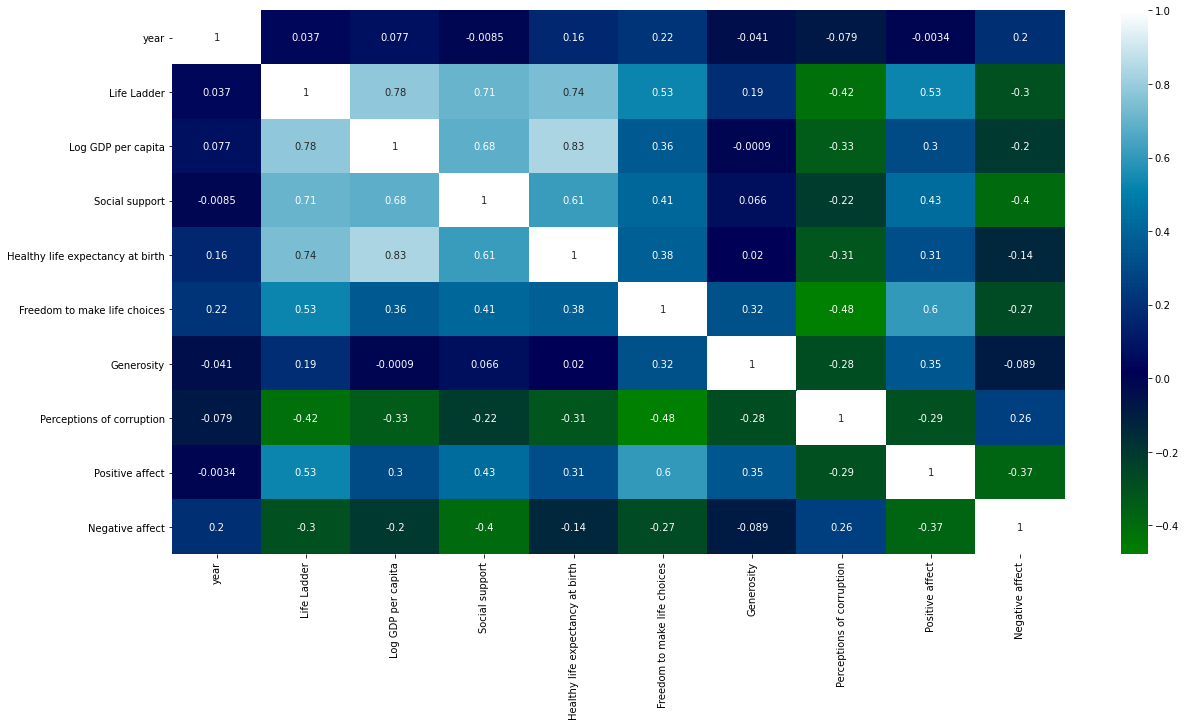

In [8]:
corr = hpp_df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(data= corr ,cmap='ocean', annot=True)
corr

---
</div>
🦄🦄🦄🦄🦄🦄🦄🦄 

<div style="direction:rtl"> 
נבדוק את מידת ההשפעה בין תמיכה חברתית לאיכות חיים, ונציג זאת באמצעות הקורלציות, קו רגרסיה ובוקספלוט
</div>

,Social support,Life Ladder
Social support,1.000000,0.706126
Life Ladder,0.706126,1.000000


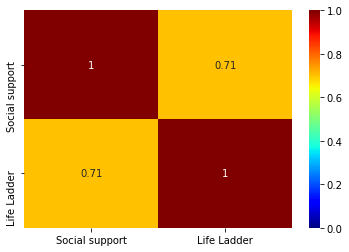

In [9]:
df_life = hpp_df[["Social support" ,'Life Ladder']]
sns.heatmap(df_life.corr(), vmin=0.0 , vmax = 1,cmap='jet' , annot=True)
df_life.corr()

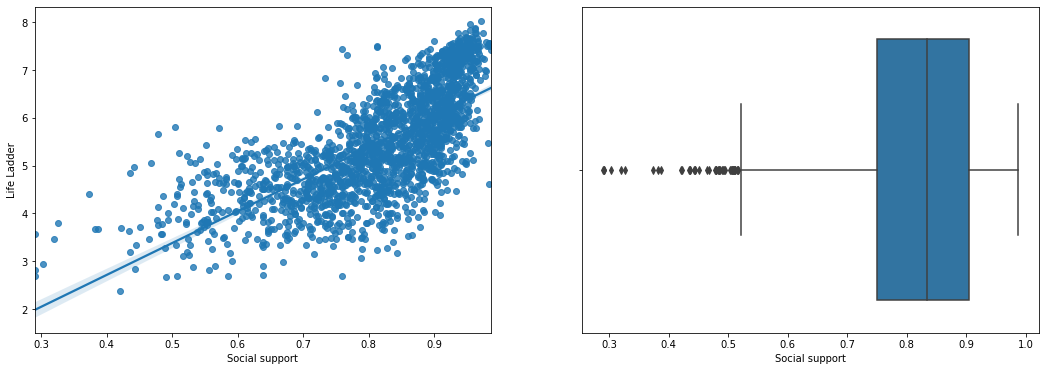

0.8340000000000001


In [10]:
fig, axes = plt.subplots(figsize=(18, 6), ncols=2)

sns.regplot(ax=axes[0], x="Social support" , y='Life Ladder', data=df_life);
sns.boxplot(ax=axes[1], x='Social support', data=hpp_df)
plt.show()
print(hpp_df["Social support"].median())


<div style="direction:rtl"> 
על מנת לבדוק את נכונות הטענה, בדקנו את הקורלציה בין המדינות בהן רמת התמיכה החברתית גבוהה (מעל לחציון) ואת הקורלציה בין המדינות בהן רמת התמיכה החברתית נמוכה (מתחת לחציון)</div>

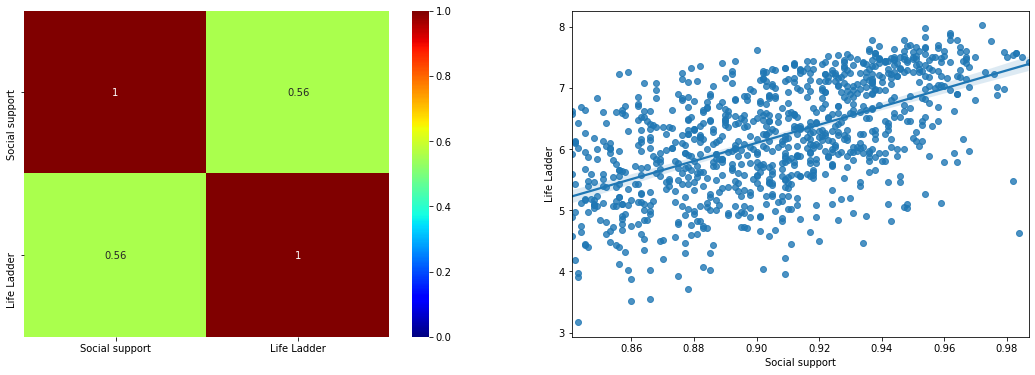

<Figure size 576x432 with 0 Axes>

In [11]:
most_social = df_life[df_life["Social support"] > 0.84]

fig, axes = plt.subplots(figsize=(18, 6), ncols=2)

sns.heatmap(ax = axes[0], data = most_social.corr(), vmin=0.0 , vmax = 1,cmap='jet' , annot=True)
plt.figure(figsize=(8,6))
sns.regplot(ax = axes[1], x="Social support" , y='Life Ladder', data=most_social);

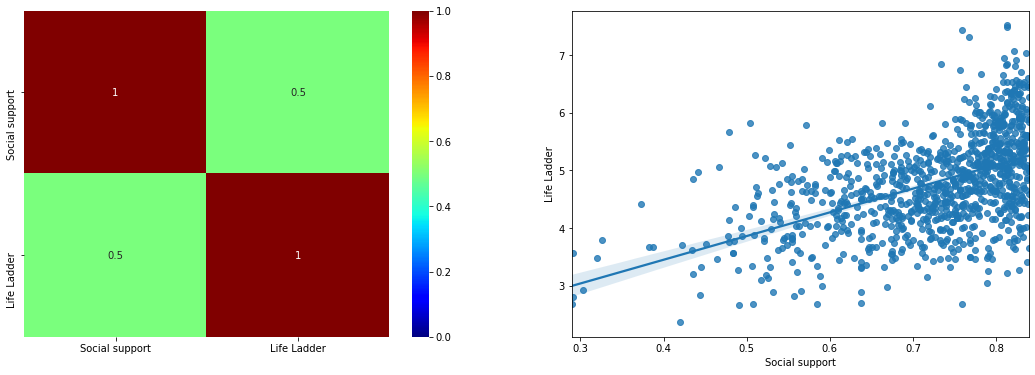

<Figure size 576x432 with 0 Axes>

In [12]:
low_social = df_life[df_life["Social support"] < 0.84]

fig, axes = plt.subplots(figsize=(18, 6), ncols=2)

sns.heatmap(ax = axes[0], data = low_social.corr(), vmin=0.0 , vmax = 1,cmap='jet' , annot=True)
plt.figure(figsize=(8,6))
sns.regplot(ax = axes[1], x="Social support" , y='Life Ladder', data=low_social);

<div style="direction:rtl"> 


>##### מסקנה 1:
> <div style="direction:rtl"> </div>
><div style="direction:rtl">    ניתן לראות שתמיכה חברתית היא מרכיב משמעותי בחיים מאושרים בכל מדינה - ככל שהתמיכה החברתית עולה, כך איכות החיים במדינה עולה וכן להפך </div>
> <div style="direction:rtl"> </div>
---
</div>


<div style="direction:rtl"> 
כעת נשתמש בדאטה שמקובצת לפי מדינות, ונבדוק מהו החציון של רמת איכות החיים בין כל מדינות העולם. לאחר מכן, נגדיר טווחים לרמת איכות חיים ונצור סרגל איכות חיים לכל מדינות העולם.
</div>

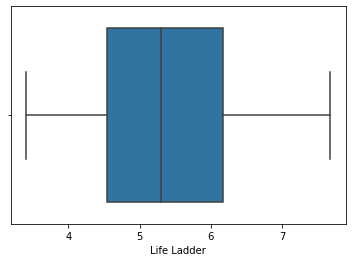

5.306357142857142


In [13]:
sns.boxplot(x="Life Ladder", data=hpp2)
plt.show()
print(hpp2["Life Ladder"].median())

<div style="direction:rtl"> 
נבחר את קצוות התוחם כך שהקצה הנמוך (3-4) והגבוה (7-8) יהיו שווים בתחום הבדיד. כלומר לשמור על סדר גודל דומה בין התחום הנמוך לתחום הגבוה.
</div>

In [14]:
range_ladder = pd.cut(hpp2['Life Ladder'], [3, 4, 7, 8])
ruler_ladder = hpp2.pivot_table('Log GDP per capita', ['Country name', range_ladder])
ruler_ladder

,,Log GDP per capita
Country name,Life Ladder,
Afghanistan,"(3, 4]",7.650833
Albania,"(4, 7]",9.384385
Algeria,"(4, 7]",9.328875
Angola,"(4, 7]",8.990000
Argentina,"(4, 7]",10.033800
...,...,...
Venezuela,"(4, 7]",9.480083
Vietnam,"(4, 7]",8.655286
Yemen,"(3, 4]",8.102700


,Log GDP per capita
Life Ladder,
"(3, 4]",13
"(4, 7]",137
"(7, 8]",16


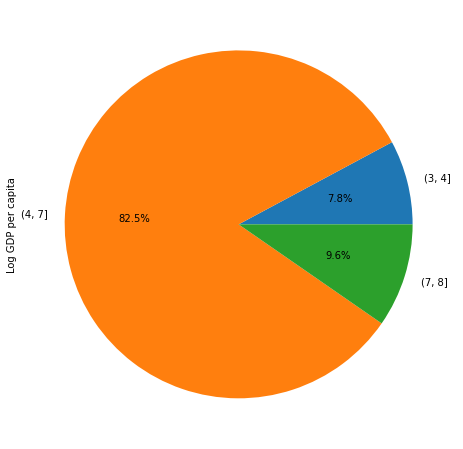

In [15]:
plt.figure(figsize=(8,8))

groupby_ladder = ruler_ladder.groupby("Life Ladder").count()
groupby_ladder["Log GDP per capita"].plot.pie(autopct='%1.1f%%')
groupby_ladder

<div style="direction:rtl"> 
נתמקד במדינות באחוזון הגבוה של איכות החיים ("המדינות המאושרות"), וננסה להבין מה מאפיין מדינות אלו כמדינות "הכי מאושרות".
    נבדוק בהתחלה את הקשר בין הציון בסולם האושר, לבין תחושת חופש הבחירה:
</div>

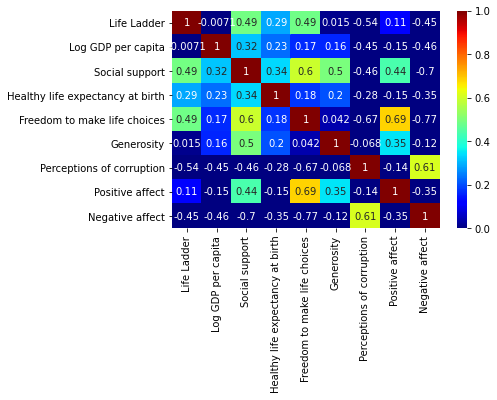

In [16]:
most_happy = hpp2[(hpp2["Life Ladder"] <= 8) & (hpp2["Life Ladder"] > 7)]
sns.heatmap( data = most_happy.corr(), vmin=0.0 , vmax = 1,cmap='jet' , annot=True)

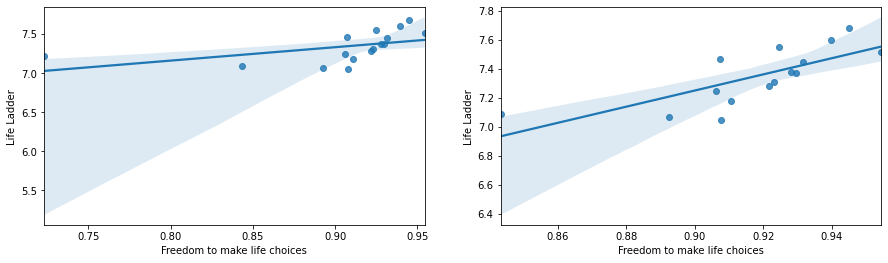

In [17]:
##----->תיקון והורדת ישראל

fig, axes = plt.subplots(figsize=(15, 4), ncols=2)

sns.regplot(ax = axes[0], x="Freedom to make life choices" , y='Life Ladder', data=most_happy);
most_happy2 = most_happy.copy()
part1 = most_happy2[0:8]
part2 = most_happy2[9:16]
most_happy3 = pd.concat([part1, part2], axis=0)
sns.regplot(ax = axes[1], x="Freedom to make life choices" , y='Life Ladder', data=most_happy3);

🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄

---
</div>
<div style="direction:rtl"> 
על מנת להבין את התמונה יותר, נתמקד בהיבט נוסף של מדינות בעלות ציון גבוה בסולם האושר. ניתן לראות כי ישנו קשר שלילי חזק בין סולם האושר לבין תפיסת השחיטות במדינה. ככל שסולם האושר עולה, כך תפיסת השחיתות יורדת.  
    
</div>    

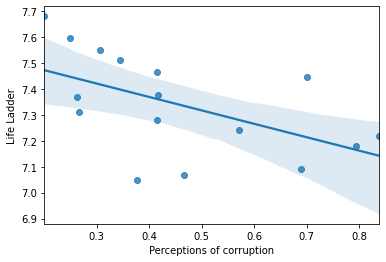

In [18]:
sns.regplot (x="Perceptions of corruption" , y='Life Ladder', data=most_happy);

<div style="direction:rtl"> 


>##### מסקנה 2:
> <div style="direction:rtl"> </div>
><div style="direction:rtl">   מהנתונים שהצגנו ניתן להסיק כי במדינות מאושרות ישנם מאפיינים משותפים, כגון: ההשפעה של סולם האושר על חופש הבחירה וההשפעה של סולם האושר על תפיסת השחיתות. מתוך מסקנות אלו ניתן להסיק מהם המאפיינים של מדינות מאושרות באמת.</div>
> <div style="direction:rtl"> </div>
---
</div>


<div style="direction:rtl"> 
נמשיך אל המדינות ה"לא מאושרות". ננסה לבדוק מה מאפיין מדינות אלו כמדינות "לא מאושרות":                            
    ניתן לראות כי לעומת מדינות מאושרות, המדינות ה"לא מאושרות" לא מתאפיינות בשום קשר בין סולם האושר לבין חופש הבחירה. 
</div>

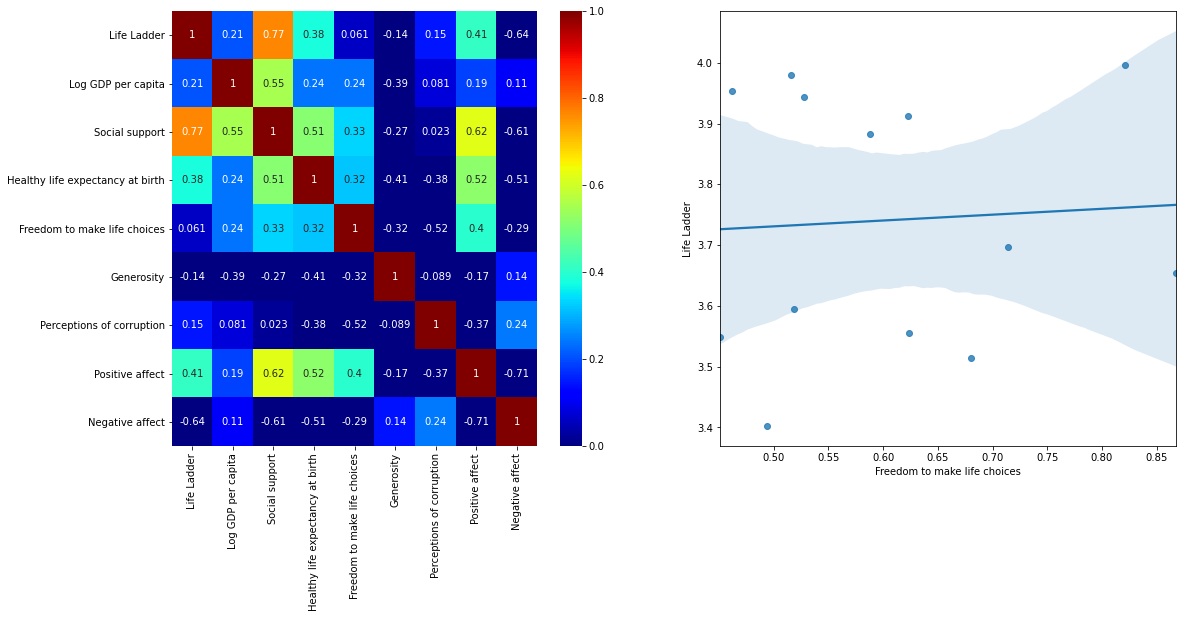

In [19]:
fig, axes = plt.subplots(figsize=(18, 8), ncols=2)

not_happy = hpp2[(hpp2["Life Ladder"] <= 4) & (hpp2["Life Ladder"] > 0)]
sns.heatmap(ax=axes[0], data=not_happy.corr(), vmin=0.0 , vmax = 1,cmap='jet' , annot=True)
sns.regplot(ax = axes[1], x="Freedom to make life choices" , y='Life Ladder', data=not_happy);

---
</div>
<div style="direction:rtl"> 
במדינות "לא מאושרות", אפשר לראות כי עלייה בציון בסולם האושר, לא גורם לירידה בתפיסת השחיתות.
    בדאטה המקורי של ה"לא מאושרות" הייתה לנו מדינה "סוררת" (רואנדה) שהערכים שלה היו בסטייה ניכרת ולכן בחרנו להוריד אותה.
</div>

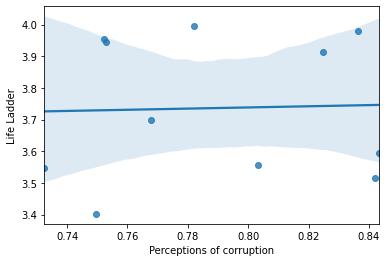

In [20]:
not_happy2 = not_happy.copy()
part3 = not_happy2[0:7]
part4 = not_happy2[8:12]
not_happy3 = pd.concat([part3, part4], axis=0)
not_happy3
sns.regplot (x="Perceptions of corruption" , y='Life Ladder', data=not_happy3);

<div style="direction:rtl"> 


>##### מסקנה 3:
> <div style="direction:rtl"> </div>
><div style="direction:rtl">    מהנתונים שהצגנו ניתן להסיק כי במדינות לא מאושרות ישנם מאפיינים משותפים, כגון: אי תלות בין סולם  אושר לבין תפיסת השחיתות, ובנוסף לבין חופש הבחירה. מתוך מסקנות אלו ניתן להסיק מהם המאפיינים של מדינות לא מאושרות באמת.  </div>
> <div style="direction:rtl"> </div>
---
</div>


---
</div>

<div style="direction:rtl"> 
על מנת לבדוק את את מהימנות המסקנות, יצרנו מודל שחוזה על פי מאפיינים אלו בלבד את רמת האושר במדינה.
</div>

In [21]:
features = ["Social support","Freedom to make life choices","Perceptions of corruption"]
y = hpp2["Life Ladder"]
X = hpp2[features]
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=0) 
happy_model = DecisionTreeRegressor(random_state=4, max_depth = 2)
happy_model.fit(X_train, y_train)
test_pred = happy_model.predict(X_test)


def mse(a,b):
    return np.sqrt(np.square(a-b).mean())


print("MSE: {:.3f}".format(mse(y_test.values,test_pred)))

df = pd.DataFrame(columns = ['Life Ladder', 'Predictions'])
df['Life Ladder'] = y_test
df = df.reset_index(drop=True)
df['Predictions'] = pd.Series(test_pred)
df.head(15)

MSE: 0.632


,Life Ladder,Predictions
0,3.912250,4.416904
1,4.873000,5.959421
2,4.411462,5.171777
3,6.253214,5.171777
4,3.555000,4.416904
5,5.549929,5.171777
6,7.242231,7.123432
7,4.513571,4.416904
8,5.874933,5.171777
9,5.306857,5.959421


<div style="direction:rtl"> 


>##### המסקנה המרכזית:
> <div style="direction:rtl"> </div>
><div style="direction:rtl">    מניתוח מדד האושר העולמי מתקבלת המסקנה, כי המאפיינים המרכזיים במדינה מאושרת הם:  1) תמיכה חברתית 2)תפיסת השחיתות במדינה 3)וחופש הבחירה.  </div>
> <div style="direction:rtl"> </div>
---
</div>


🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄🦄
---
</div>
